In [1]:
include("Born_Calderon_3d_Radial.jl");
using ArbNumerics, Plots, .Born_Calderon_3d_Radial;

setworkingprecision(ArbReal, digits=500);

Set the constant $\kappa$ and the function $q(r)$, as well as the full potential $V(r)=q(r)-\kappa$. Plot them.

Note: $q(r)$ and $V(r)$ must be $0$ outside $[0,1]$ so include the first factor at all times. If they have jumps they must be right-continuous.

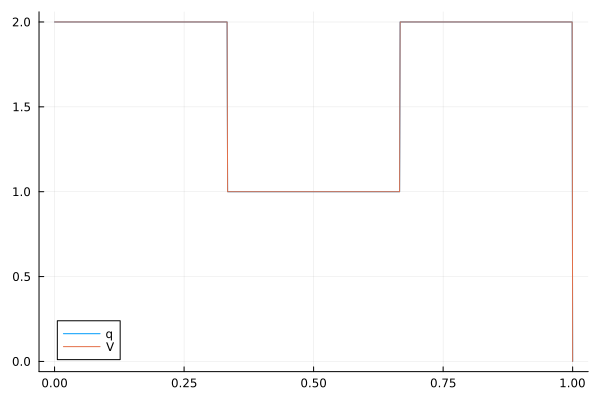

In [2]:
κ = ArbReal(0);

q(r) = (0 <= r && r <= 1) * (ArbReal(2) * (0 <= r && r < 1 // 3) + ArbReal(1) * (1 // 3 <= r && r < 2 // 3) + ArbReal(2) * (2 // 3 <= r && r < 1));

V(r) = (0 <= r && r <= 1) * (q(r) - κ);


R = 0:0.001:1;
plot(R, q.(R), label="q")
plot!(R, V.(R), label="V")

Compute the eigenvalues of the DtN map with potential $V(r)$.

In [3]:
Eig = EigDtN.(V, 0:500, 3);

Plot $\mathcal{F}q(\xi)$ and $\mathcal{F}q_{\kappa}^\mathrm{B}(\xi)$ and *look for* $\xi_0$, which is the maximum $\xi$ before the polynomial explosion of $\mathcal{F}q_{\kappa}^\mathrm{B}(\xi)$.

In [4]:
Ξ, plot_Fq = Fourier(q, 1000, 1 / 200);

Ξ2 = ArbReal.(10:10:400);
plot_FqB = map(ξ -> FqB(κ, Eig, ξ), Ξ2);

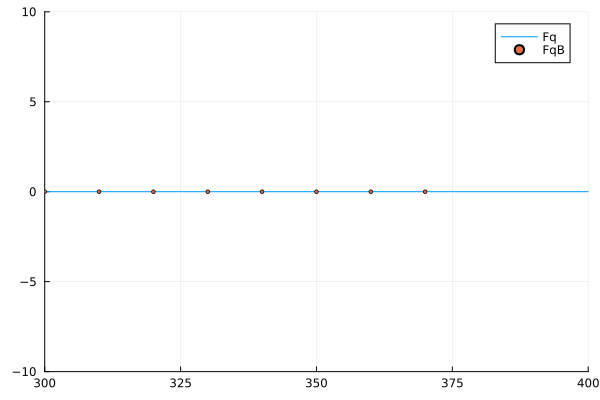

In [5]:
plot(Ξ, plot_Fq, xlimits=(300, 400), ylimits=(-10, 10), label="Fq")
scatter!(Ξ2, plot_FqB, ms=2, label="FqB")

Set $\xi_0$, compute $q_{\kappa}^{\mathrm{B}}(r)$ and plot it together with $q(r)$.

In [6]:
ξ_0 = 370;

R, plot_qB = Fourier(ξ -> FqB(κ, Eig, ξ), ξ_0, 1);
plot_qB = plot_qB[R.<1] / (2 * pi)^3;
R = R[R.<1];

0.0
0.66066


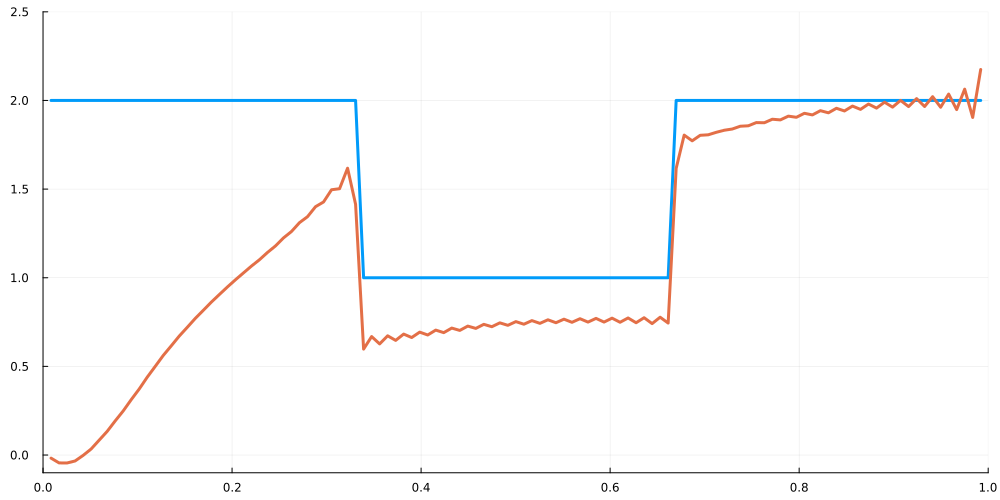

In [7]:
norm_1 = round(Integral(R, abs.(plot_qB .- Float64.(q.(R)))), digits=5);
round_κ = round(Float64(κ), digits=5);
println(round_κ)
println(norm_1)

plot(R, q.(R), linewidth=3,
    legend=false,
    xlimits=(0, 1),
    ylimits=(-0.1, 2.5),
    size=(1000, 500)
)
plot!(R, plot_qB, linewidth=3)

In [8]:
savefig("($round_κ)($norm_1).png");